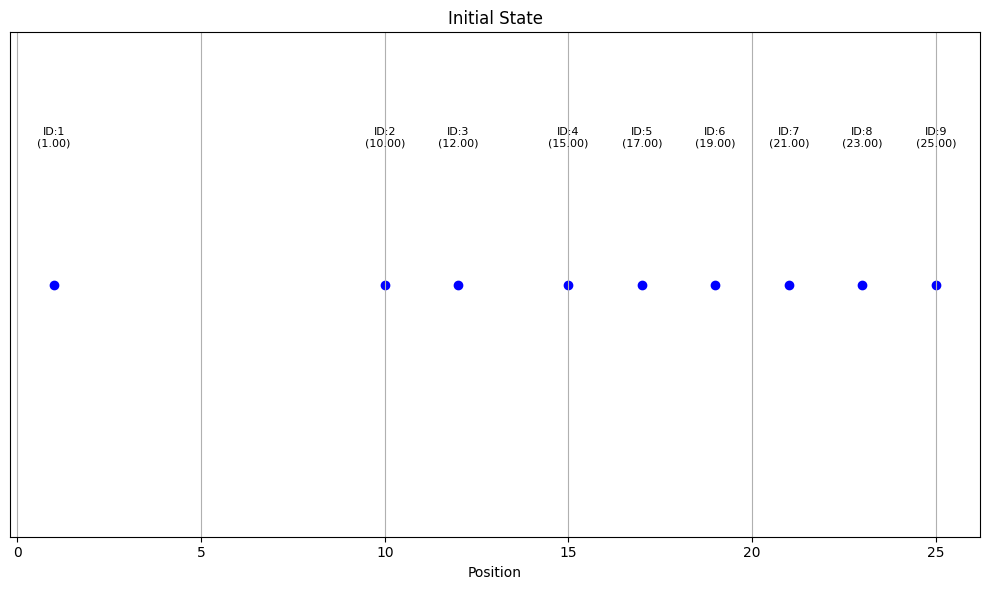

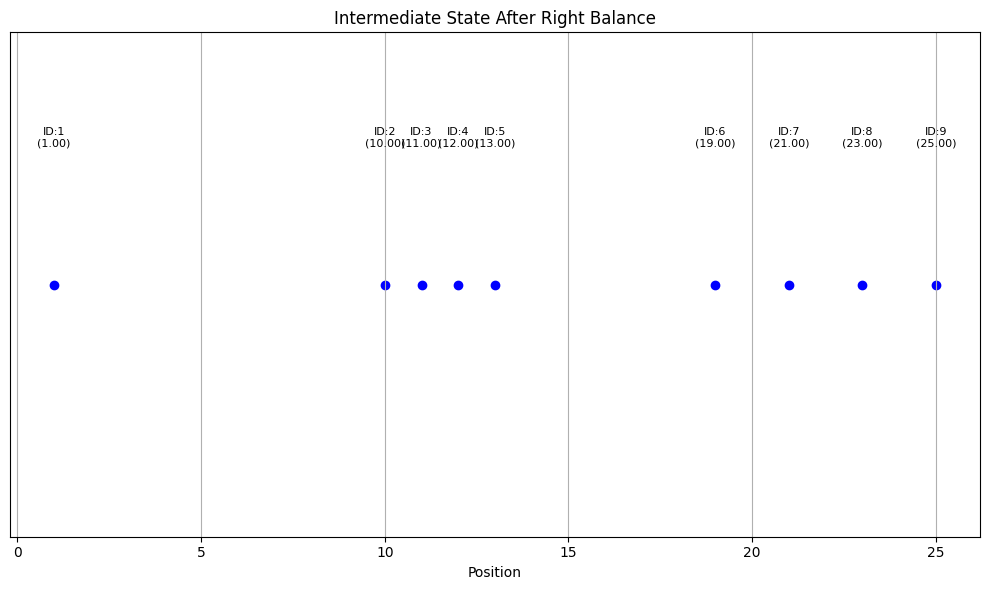

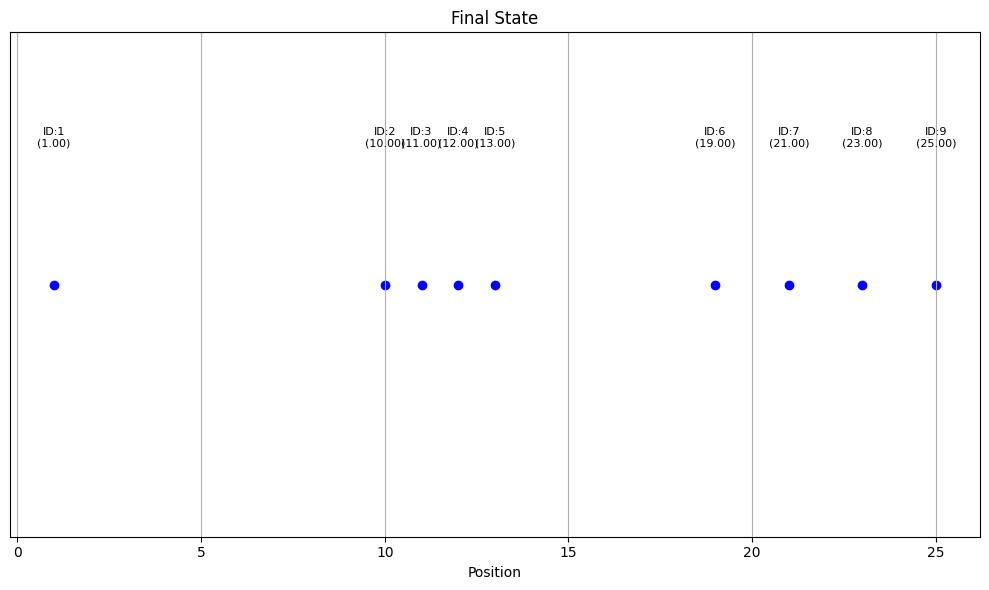

In [2]:
import matplotlib.pyplot as plt

class Robot:
    def __init__(self, pos: float, id: int):
        self.pos = pos
        self.id = id
        self.target_pos = pos

    def get_position(self) -> float:
        return self.pos

    def get_id(self) -> int:
        return self.id

    def move_towards_target(self):
        self.pos = self.target_pos

def record_positions(robots):
    return [(r.get_id(), r.get_position()) for r in robots]

def plot_positions_sequence(positions_list, titles):
    for i, (positions, title) in enumerate(zip(positions_list, titles)):
        ids, pos = zip(*positions)
        plt.figure(figsize=(10, 6))
        plt.scatter(pos, [1]*len(pos), color='blue')
        for i, p in enumerate(pos):
            label = f"ID:{ids[i]}\n({p:.2f})"
            plt.text(p, 1.03, label, ha='center', fontsize=8)
        plt.yticks([])
        plt.title(title)
        plt.xlabel("Position")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Stepwise logic starts here
def rightBalance(robots, midPoint, snapshots, titles):
    leftRobots = []
    rightRobots = []
    for robot in robots:
        if robot.get_position() < midPoint:
            leftRobots.append(robot)
        else:
            rightRobots.append(robot)

    extraRobots = (len(rightRobots) - len(leftRobots) + 1) // 2
    if len(robots) % 2 == 1:
        maxPos = midPoint - extraRobots + 1 - len(leftRobots)
        newPos = midPoint - extraRobots + 1
    else:
        maxPos = midPoint - extraRobots + 0.5 - len(leftRobots)
        newPos = midPoint - extraRobots + 0.5

    for i in range(len(leftRobots)):
        if leftRobots[i].get_position() > maxPos:
            leftRobots[i].target_pos = maxPos
        maxPos += 1

    for i in range(min(extraRobots, len(rightRobots))):
        rightRobots[i].target_pos = newPos
        newPos += 1

    robots[:] = leftRobots + rightRobots
    # Snapshot after target assignment
    for r in robots:
        r.move_towards_target()
    snapshots.append(record_positions(robots))
    titles.append("Intermediate State After Right Balance")

def leftBalance(robots, midPoint, snapshots, titles):
    leftRobots = []
    rightRobots = []
    for robot in robots:
        if robot.get_position() <= midPoint:
            leftRobots.append(robot)
        else:
            rightRobots.append(robot)

    extraRobots = (len(leftRobots) - len(rightRobots) + 1) // 2
    if len(robots) % 2 == 1:
        minPos = midPoint + extraRobots - 1 + len(rightRobots)
        newPos = midPoint + extraRobots - 1
    else:
        minPos = midPoint + extraRobots - 0.5 + len(rightRobots)
        newPos = midPoint + extraRobots - 0.5

    for i in range(len(rightRobots) - 1, -1, -1):
        if rightRobots[i].get_position() < minPos:
            rightRobots[i].target_pos = minPos
        minPos -= 1

    for i in range(len(leftRobots) - 1, max(len(leftRobots) - extraRobots, 0) - 1, -1):
        leftRobots[i].target_pos = newPos
        newPos -= 1

    robots[:] = leftRobots + rightRobots
    # Snapshot after target assignment
    for r in robots:
        r.move_towards_target()
    snapshots.append(record_positions(robots))
    titles.append("Intermediate State After Left Balance")

def balance_with_snapshots(robots):
    snapshots = []
    titles = []

    snapshots.append(record_positions(robots))
    titles.append("Initial State")

    robots.sort(key=lambda r: r.get_position())
    leftPos = robots[0].get_position()
    rightPos = robots[-1].get_position()
    midPoint = (leftPos + rightPos) / 2

    leftCount = sum(1 for r in robots if r.get_position() < midPoint)
    rightCount = sum(1 for r in robots if r.get_position() > midPoint)

    if leftCount > rightCount:
        leftBalance(robots, midPoint, snapshots, titles)
    elif rightCount > leftCount:
        rightBalance(robots, midPoint, snapshots, titles)

    snapshots.append(record_positions(robots))
    titles.append("Final State")

    return snapshots, titles

# --- Main ---
robots = [
    Robot(1, 1),
    Robot(10, 2),
    Robot(12, 3),
    Robot(15, 4),
    Robot(17, 5),
    Robot(19, 6),
    Robot(21, 7),
    Robot(23, 8),
    Robot(25, 9)
]

snapshots, titles = balance_with_snapshots(robots)
plot_positions_sequence(snapshots, titles)
